# `Clothes Image Classification`
<hr>

In this project, we will build several deep learning models using transfer learning method to classify images on the clothes dataset provided by OLX.

In [13]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False
print("The TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Bad key text.latex.unicode in file C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution
Bad key savefig.frameon in file C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution
Bad key pgf.debug in file C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
http

The TensorFlow version: 2.3.0
Num GPUs Available:  0


# `Dataset`
<hr>

## Check the Image Dataset
To see the images using Python, we can use `matplotlib.pyplot.gcf()` class to get the current figure and set it to have a specific number of rows and columns. Hence, in each row and column, we can put an image as a subplot.

In [14]:
# List the image names inside the training data
train_dir = 'Datasets/train'
test_dir = 'Datasets/test'
print(os.listdir(train_dir))
print(os.listdir(test_dir))

['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']
['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']


In [15]:
# Set the directory for each type of clothes image
# Training directory
train_dress_dir = os.path.join(train_dir, 'dress')
train_hat_dir = os.path.join(train_dir, 'hat')
train_longsleeve_dir = os.path.join(train_dir, 'longsleeve')
train_outwear_dir = os.path.join(train_dir, 'outwear')
train_pants_dir = os.path.join(train_dir, 'pants')
train_shirt_dir = os.path.join(train_dir, 'shirt')
train_shoes_dir = os.path.join(train_dir, 'shoes')
train_shorts_dir = os.path.join(train_dir, 'shorts')
train_skirt_dir = os.path.join(train_dir, 'skirt')
train_t_shirt_dir = os.path.join(train_dir, 'shirt')

# Test directory
test_dress_dir = os.path.join(test_dir, 'dress')
test_hat_dir = os.path.join(test_dir, 'hat')
test_longsleeve_dir = os.path.join(test_dir, 'longsleeve')
test_outwear_dir = os.path.join(test_dir, 'outwear')
test_pants_dir = os.path.join(test_dir, 'pants')
test_shirt_dir = os.path.join(test_dir, 'shirt')
test_shoes_dir = os.path.join(test_dir, 'shoes')
test_shorts_dir = os.path.join(test_dir, 'shorts')
test_skirt_dir = os.path.join(test_dir, 'skirt')
test_t_shirt_dir = os.path.join(test_dir, 'shirt')

In [16]:
# Get the names for each image in each training directory
# Training images
train_dress_names = os.listdir(train_dress_dir)
train_hat_names = os.listdir(train_hat_dir)
train_longsleeve_names = os.listdir(train_longsleeve_dir)
train_outwear_names = os.listdir(train_outwear_dir)
train_pants_names = os.listdir(train_pants_dir)
train_shirt_names = os.listdir(train_shirt_dir)
train_shoes_names = os.listdir(train_shoes_dir)
train_shorts_names = os.listdir(train_shorts_dir)
train_skirt_names = os.listdir(train_skirt_dir)
train_t_shirt_names = os.listdir(train_t_shirt_dir)

# Test images
test_dress_names = os.listdir(test_dress_dir)
test_hat_names = os.listdir(test_hat_dir)
test_longsleeve_names = os.listdir(test_longsleeve_dir)
test_outwear_names = os.listdir(test_outwear_dir)
test_pants_names = os.listdir(test_pants_dir)
test_shirt_names = os.listdir(test_shirt_dir)
test_shoes_names = os.listdir(test_shoes_dir)
test_shorts_names = os.listdir(test_shorts_dir)
test_skirt_names = os.listdir(test_skirt_dir)
test_t_shirt_names = os.listdir(test_t_shirt_dir)

In [17]:
pic_index = 1

# Get a complete path to the every type of clothes image
dress_pic = [os.path.join(train_dress_dir, name_fic) for name_fic in train_dress_names[0:pic_index]]
hat_pic = [os.path.join(train_hat_dir, name_fic) for name_fic in train_hat_names[0:pic_index]]
longsleeve_pic = [os.path.join(train_longsleeve_dir, name_fic) for name_fic in train_longsleeve_names[0:pic_index]]
outwear_pic = [os.path.join(train_outwear_dir, name_fic) for name_fic in train_outwear_names[0:pic_index]]
pants_pic = [os.path.join(train_pants_dir, name_fic) for name_fic in train_pants_names[0:pic_index]]
shirt_pic = [os.path.join(train_shirt_dir, name_fic) for name_fic in train_shirt_names[0:pic_index]]
shoes_pic = [os.path.join(train_shoes_dir, name_fic) for name_fic in train_shoes_names[0:pic_index]]
shorts_pic = [os.path.join(train_shorts_dir, name_fic) for name_fic in train_shorts_names[0:pic_index]]
skirt_pic = [os.path.join(train_skirt_dir, name_fic) for name_fic in train_skirt_names[0:pic_index]]
t_shirt_pic = [os.path.join(train_t_shirt_dir, name_fic) for name_fic in train_t_shirt_names[0:pic_index]]

all_pic = dress_pic + hat_pic + longsleeve_pic + outwear_pic + pants_pic + shirt_pic + shoes_pic + shorts_pic + skirt_pic + t_shirt_pic


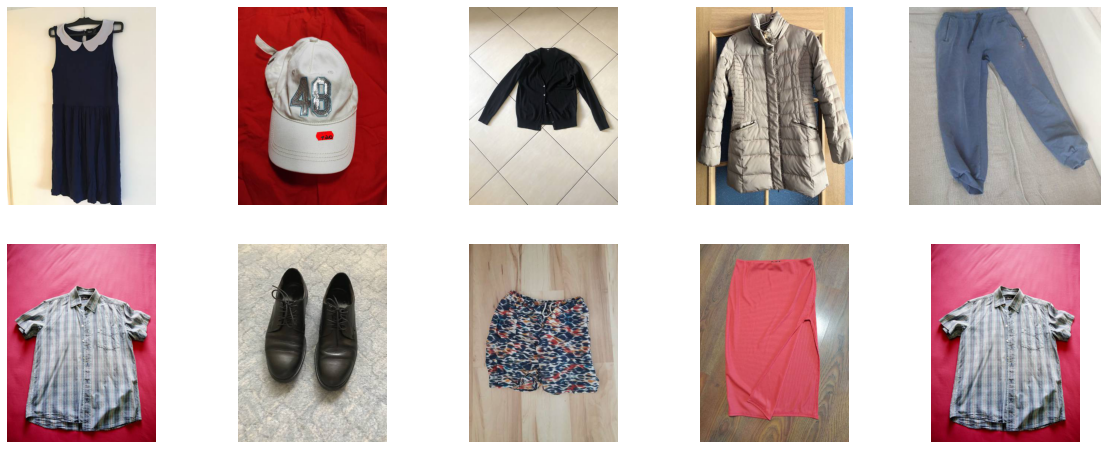

In [18]:
# Set the parameters for 2x5 image dislay
nrows = 2
ncols = 5
# Using matplotlib get the current figure class plt.gcf()
fig = plt.gcf()
# Set up matplotlib fig, and size it to fit 2x5 pics
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(all_pic):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    sp.set_label(i)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

The result shows 10 images corresponding to 10 classes we will try to classify. 

On the other hand, we can also use `load_img` from tensorflow preprocessing module for image to see the image faster.

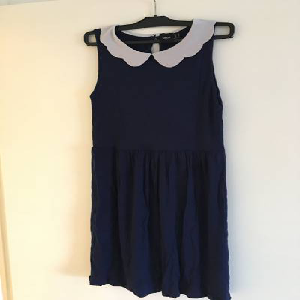

In [19]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img(dress_pic[0], target_size=(300,300))
img

# Deep Learning Model 
<hr>

## Transfer Learning - InceptionV3

Keras has __model definition__ built-in for `InceptionV3`.
Import the class and instantiate it by specifying several parameters as follows:
- `include_top` = `False` or `True`<br>
    Set it to `False` to not include the fully-connected layer at the top, as the last layer of the network.
    
    
- `input_shape` = `(150, 150, 3)` _(3D shape image)_ <br>
    The desired input shape image.
    
    
- `weights`=`None` or `'imagenet'`<br>
    Set it to `None` will generate random initialization. Set it to `'imagenet'` will use the built-in weights. We will set it to `None ` so that later we can replace and load the weights with the one we just downloaded it.

In [20]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O inception/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights = 'inception/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Define the pre-trained model definition
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

# Load the local_weights to the Inception model
pre_trained_model.load_weights(local_weights)   

# Iterate through its layers and lock them by setting trainable to False
for layer in pre_trained_model.layers:
    layer.trainable = False

In [22]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

Each layer has its own name, where the last layer's name is __mixed10__ which has been convolved to 3 by 3. 

What's interesting is that we can decide to move up the last layer to use a little more information.
For instance, __mixed7__, with the output of 7 by 7. 

Hence, it's find to experiment choosing the last layer for our needs.

In [23]:
last_layer = pre_trained_model.get_layer('mixed7')
print('The last layer output shape:', last_layer.output_shape)
last_output = last_layer.output
last_output

The last layer output shape: (None, 7, 7, 768)


<tf.Tensor 'mixed7/concat_5:0' shape=(None, 7, 7, 768) dtype=float32>

## Build the New Model

We will define the new model that take the pre_trained_model of InceptionV3 into account to classify clothes images with 10 different categories.

Here, we can build the last layers for the new model as follows:

In [24]:
pre_trained_model.input

<tf.Tensor 'input_1_5:0' shape=(None, 150, 150, 3) dtype=float32>

In [25]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

x = Flatten()(last_output)
x = Dense( units= 1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=10, activation='softmax')(x)

# Define the model
model = Model( inputs = pre_trained_model.input, outputs = x)

# compile the model
lr = 0.01
model.compile(optimizer=Adam(lr), 
              loss=CategoricalCrossentropy(), 
              metrics=['acc'])

# Data Preprocessing 

Finally, we can use `ImageDatagenerator` to generate the image to data for our model.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale=1./255)
test_datagen = ImageDataGenerator( rescale=1./255)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------

train_generator = train_datagen.flow_from_directory(directory= train_dir, 
                                                    seed=1, 
                                                    target_size= (150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

# --------------------
# Flow test images in batches of 32 using test_datagen generator
# --------------------

test_generator = test_datagen.flow_from_directory(directory= test_dir,
                                                  seed=1,
                                                  target_size= (150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 3068 images belonging to 10 classes.
Found 372 images belonging to 10 classes.


In [27]:
X, y = next(train_generator)

In [28]:
print(X.shape)
print(y.shape)
print(X)
print(y)

(32, 150, 150, 3)
(32, 10)
[[[[0.54901963 0.5372549  0.47058827]
   [0.5686275  0.5568628  0.4901961 ]
   [0.57254905 0.56078434 0.49411768]
   ...
   [0.7411765  0.74509805 0.6901961 ]
   [0.7372549  0.7411765  0.6862745 ]
   [0.73333335 0.7372549  0.68235296]]

  [[0.5568628  0.54509807 0.4784314 ]
   [0.5764706  0.5647059  0.49803925]
   [0.5803922  0.5686275  0.5019608 ]
   ...
   [0.7568628  0.7607844  0.7058824 ]
   [0.7490196  0.75294125 0.69803923]
   [0.7490196  0.75294125 0.69803923]]

  [[0.5529412  0.5411765  0.47450984]
   [0.5686275  0.5568628  0.4901961 ]
   [0.5803922  0.5686275  0.5019608 ]
   ...
   [0.7568628  0.7607844  0.7058824 ]
   [0.7490196  0.75294125 0.69803923]
   [0.7490196  0.75294125 0.69803923]]

  ...

  [[0.24313727 0.24705884 0.18431373]
   [0.27450982 0.2784314  0.21568629]
   [0.3019608  0.30588236 0.24313727]
   ...
   [0.7058824  0.6901961  0.6431373 ]
   [0.7176471  0.7019608  0.654902  ]
   [0.7490196  0.73333335 0.6862745 ]]

  [[0.28235295 0.2

In [29]:
# See what's inside the data generator
print('Training size for 1 batch: {}'.format(train_generator[0][0].shape))
print('Test size for 1 batch: {}'.format(test_generator[0][0].shape))

print('----------------------------------------')

# print(train_generator[0][0][0]) --> first batch
print(train_generator[95][0][0]) 
# print(train_generator[95][0][0]) -> it generates error since we only have 96 batches where each batch has 32 images.
# Remember: 3068 / 32 = 95.8 ~ 96 batches


Training size for 1 batch: (32, 150, 150, 3)
Test size for 1 batch: (32, 150, 150, 3)
----------------------------------------
[[[0.16862746 0.18039216 0.20000002]
  [0.1254902  0.13725491 0.15686275]
  [0.27450982 0.28627452 0.30588236]
  ...
  [0.32156864 0.3372549  0.34117648]
  [0.31764707 0.33333334 0.32941177]
  [0.2784314  0.29803923 0.28235295]]

 [[0.12156864 0.13333334 0.15294118]
  [0.0509804  0.0627451  0.08235294]
  [0.3137255  0.3254902  0.34509805]
  ...
  [0.18823531 0.20392159 0.20784315]
  [0.18039216 0.19607845 0.19215688]
  [0.25882354 0.2784314  0.2627451 ]]

 [[0.38823533 0.40000004 0.41960788]
  [0.45882356 0.47058827 0.4901961 ]
  [0.3921569  0.4039216  0.42352945]
  ...
  [0.30980393 0.3254902  0.32941177]
  [0.2784314  0.29411766 0.2901961 ]
  [0.21176472 0.23137257 0.21568629]]

 ...

 [[0.5411765  0.37254903 0.20392159]
  [0.5372549  0.36862746 0.20000002]
  [0.5294118  0.36078432 0.19215688]
  ...
  [0.82745105 0.6039216  0.38823533]
  [0.8078432  0.5843137

# Model Training
<hr>

- We can define the early stopping function from tensorflow as callback to the model training

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, 
                                             patience=3, verbose=2, 
                                             mode='auto', restore_best_weights=True)

## Experiment 1

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

lr = 0.01
train_datagen = ImageDataGenerator( rescale=1./255)
test_datagen = ImageDataGenerator( rescale=1./255)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------

train_generator = train_datagen.flow_from_directory(directory= train_dir, 
                                                    seed=1, 
                                                    target_size= (150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

# --------------------
# Flow test images in batches of 32 using test_datagen generator
# --------------------

test_generator = test_datagen.flow_from_directory(directory= test_dir,
                                                  seed=1,
                                                  target_size= (150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Define the model
model = Model( inputs = pre_trained_model.input, outputs = x)

# compile the model
model.compile(optimizer=Adam(lr), 
              loss=CategoricalCrossentropy(), 
              metrics=['acc'])

# Train the model
history = model.fit(x = train_generator, 
                    validation_data=test_generator, 
                    callbacks=[early_stopping],
                    epochs=20, 
                    verbose=1)

# Save the trained model
model.save('Models/model_1.h5')

# Test the model using the saved model
model = load_model('Models/model_1.h5')

loss, acc = model.evaluate( test_generator, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc*100))

Found 3068 images belonging to 10 classes.
Found 372 images belonging to 10 classes.
Epoch 1/20
96/96 [==============================] - 114s 1s/step - loss: 8.4220 - acc: 0.6721 - val_loss: 0.8022 - val_acc: 0.7446
Epoch 2/20
96/96 [==============================] - 95s 985ms/step - loss: 0.4080 - acc: 0.8673 - val_loss: 0.4740 - val_acc: 0.8414
Epoch 3/20
96/96 [==============================] - 96s 998ms/step - loss: 0.3286 - acc: 0.8941 - val_loss: 0.4881 - val_acc: 0.8629
Epoch 4/20
96/96 [==============================] - 91s 952ms/step - loss: 0.4387 - acc: 0.8944 - val_loss: 0.8831 - val_acc: 0.7957
Epoch 5/20
96/96 [==============================] - 91s 951ms/step - loss: 0.4204 - acc: 0.8902 - val_loss: 1.0232 - val_acc: 0.7769
Epoch 6/20
96/96 [==============================] - 92s 958ms/step - loss: 0.4566 - acc: 0.9055 - val_loss: 0.9153 - val_acc: 0.7930
Epoch 00006: early stopping
Test loss: 0.48807260394096375
Test Accuracy: 86.29032373428345


### Visualization

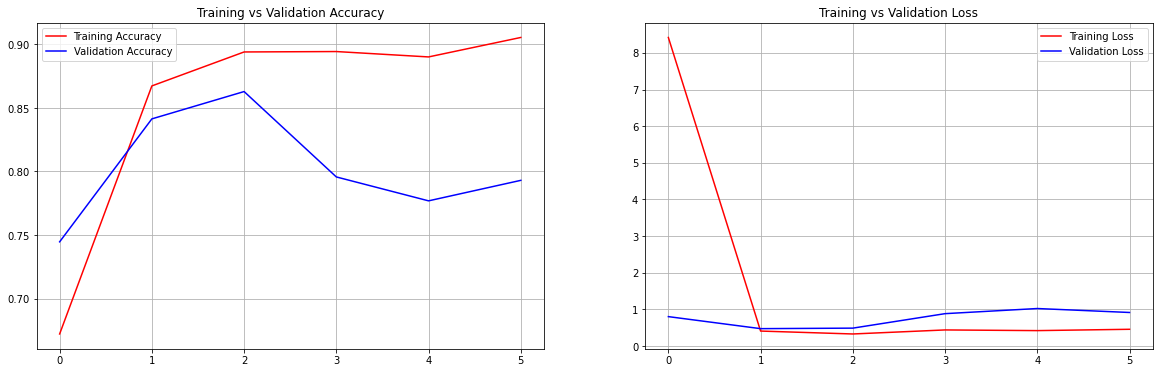

In [32]:
train_loss = history.history.get('loss')
train_acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')

epochs = range(len(history.epoch))

plt.figure( figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(epochs,train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.plot(epochs,train_loss, 'r', label = 'Training Loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

## Experiment 2

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

lr = 0.001
train_datagen = ImageDataGenerator( rescale=1./255)
test_datagen = ImageDataGenerator( rescale=1./255)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------

train_generator = train_datagen.flow_from_directory(directory= train_dir, 
                                                    seed=1, 
                                                    target_size= (150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

# --------------------
# Flow test images in batches of 32 using test_datagen generator
# --------------------

test_generator = test_datagen.flow_from_directory(directory= test_dir,
                                                  seed=1,
                                                  target_size= (150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Define the model
model = Model( inputs = pre_trained_model.input, outputs = x)

# compile the model
model.compile(optimizer=Adam(lr), 
              loss=CategoricalCrossentropy(), 
              metrics=['acc'])

# Train the model
history2 = model.fit(x = train_generator, 
                    validation_data=test_generator, 
                    callbacks=[early_stopping],
                    epochs=20, 
                    verbose=1)

# Save the trained model
model.save('Models/model_2.h5')

# Test the model using the saved model
model = load_model('Models/model_2.h5')

loss, acc = model.evaluate( test_generator, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc*100))

Found 3068 images belonging to 10 classes.
Found 372 images belonging to 10 classes.
Epoch 1/20
96/96 [==============================] - 94s 975ms/step - loss: 0.1432 - acc: 0.9534 - val_loss: 0.5783 - val_acc: 0.8817
Epoch 2/20
96/96 [==============================] - 91s 944ms/step - loss: 0.0731 - acc: 0.9746 - val_loss: 0.5656 - val_acc: 0.8952
Epoch 3/20
96/96 [==============================] - 91s 951ms/step - loss: 0.0373 - acc: 0.9889 - val_loss: 0.7627 - val_acc: 0.8441
Epoch 4/20
96/96 [==============================] - 91s 950ms/step - loss: 0.0441 - acc: 0.9847 - val_loss: 0.7948 - val_acc: 0.8602
Epoch 5/20
96/96 [==============================] - 91s 945ms/step - loss: 0.0364 - acc: 0.9889 - val_loss: 0.6955 - val_acc: 0.8763
Epoch 00005: early stopping
Test loss: 0.5656235218048096
Test Accuracy: 89.51612710952759


### Visualization

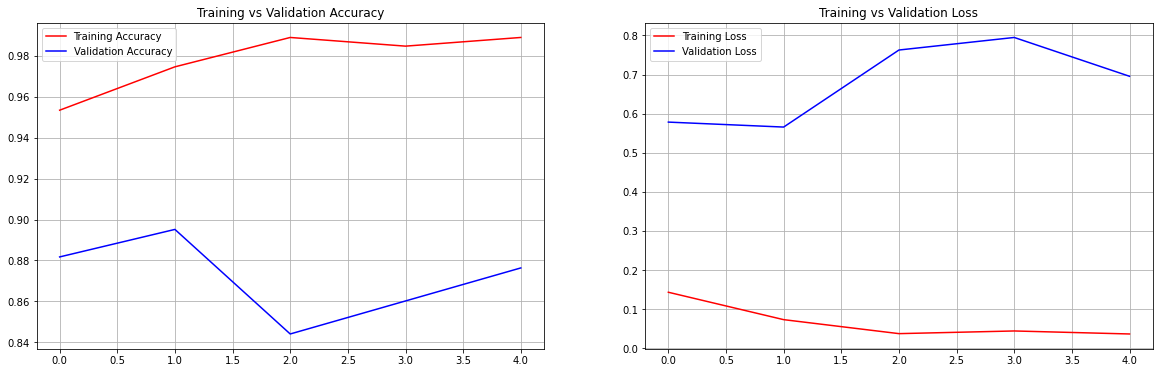

In [34]:
train_loss = history2.history.get('loss')
train_acc = history2.history.get('acc')
val_loss = history2.history.get('val_loss')
val_acc = history2.history.get('val_acc')

epochs = range(len(history2.epoch))

plt.figure( figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(epochs,train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.plot(epochs,train_loss, 'r', label = 'Training Loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

## Experiment 3

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

lr = 0.001
train_datagen = ImageDataGenerator( rescale=1./255)
test_datagen = ImageDataGenerator( rescale=1./255)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------

train_generator = train_datagen.flow_from_directory(directory= train_dir, 
                                                    seed=1, 
                                                    target_size= (150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

# --------------------
# Flow test images in batches of 32 using test_datagen generator
# --------------------

test_generator = test_datagen.flow_from_directory(directory= test_dir,
                                                  seed=1,
                                                  target_size= (150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Define the model
x = Flatten()(last_output)
x = Dense( units= 1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(units=10, activation='softmax')(x)

model = Model( inputs = pre_trained_model.input, outputs = x)

# compile the model
model.compile(optimizer=Adam(lr), 
              loss=CategoricalCrossentropy(), 
              metrics=['acc'])

# Train the model
history3 = model.fit(x = train_generator, 
                    validation_data=test_generator, 
                    callbacks=[early_stopping],
                    epochs=20, 
                    verbose=1)

# Save the trained model
model.save('Models/model_3.h5')

# Test the model using the saved model
model = load_model('Models/model_3.h5')

loss, acc = model.evaluate( test_generator, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc*100))

Found 3068 images belonging to 10 classes.
Found 372 images belonging to 10 classes.
Epoch 1/20
96/96 [==============================] - 93s 970ms/step - loss: 1.3361 - acc: 0.7161 - val_loss: 0.4344 - val_acc: 0.8548
Epoch 2/20
96/96 [==============================] - 91s 945ms/step - loss: 0.2703 - acc: 0.9087 - val_loss: 0.3406 - val_acc: 0.8737
Epoch 3/20
96/96 [==============================] - 90s 941ms/step - loss: 0.1432 - acc: 0.9488 - val_loss: 0.3168 - val_acc: 0.8978
Epoch 4/20
96/96 [==============================] - 91s 943ms/step - loss: 0.1239 - acc: 0.9566 - val_loss: 0.3027 - val_acc: 0.8898
Epoch 5/20
96/96 [==============================] - 91s 951ms/step - loss: 0.0694 - acc: 0.9759 - val_loss: 0.5118 - val_acc: 0.8548
Epoch 6/20
96/96 [==============================] - 91s 943ms/step - loss: 0.0546 - acc: 0.9817 - val_loss: 0.4689 - val_acc: 0.8683
Epoch 00006: early stopping
Test loss: 0.31675195693969727
Test Accuracy: 89.7849440574646


### Visualization

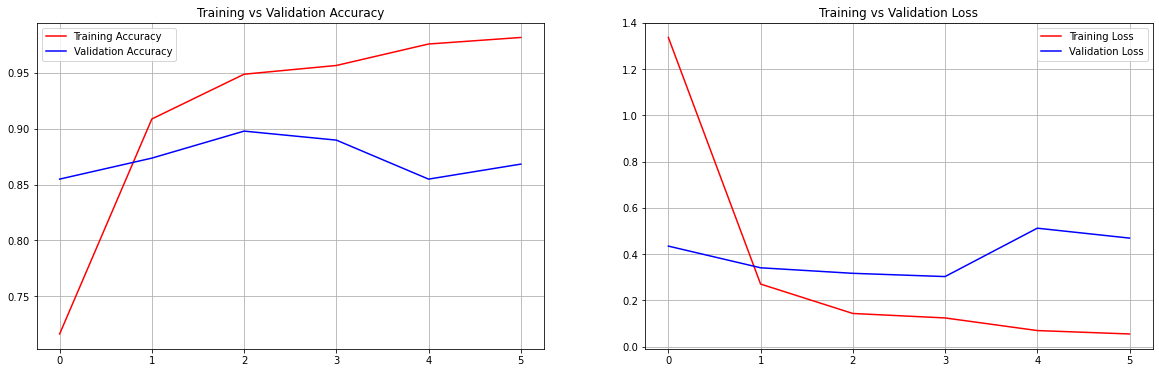

In [36]:
train_loss = history3.history.get('loss')
train_acc = history3.history.get('acc')
val_loss = history3.history.get('val_loss')
val_acc = history3.history.get('val_acc')

epochs = range(len(history3.epoch))

plt.figure( figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(epochs,train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.plot(epochs,train_loss, 'r', label = 'Training Loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

## Experiment 4

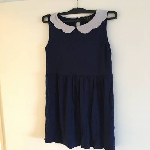

In [37]:
from PIL import Image

dress = Image.open(dress_pic[0])
dress = dress.resize((150, 150), resample=Image.NEAREST)
dress   

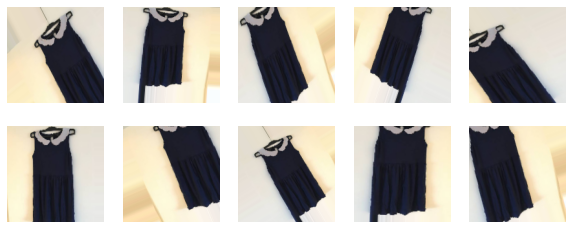

In [38]:
img_augmented = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# turn the image object into an array
img_array = np.array(dress)

plt.figure( figsize= (10, 4))

for i in range(10):
    params = img_augmented.get_random_transform((150, 150))
    img = img_augmented.apply_transform(img_array, params)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


lr = 0.001

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale=1./255)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------

train_generator = train_datagen.flow_from_directory(directory= train_dir, 
                                                    seed=1, 
                                                    target_size= (150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

# --------------------
# Flow test images in batches of 32 using test_datagen generator
# --------------------

test_generator = test_datagen.flow_from_directory(directory= test_dir,
                                                  seed=1,
                                                  target_size= (150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Define the model
x = Flatten()(last_output)
x = Dense( units= 1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(units=10, activation='softmax')(x)

model = Model( inputs = pre_trained_model.input, outputs = x)

# compile the model
model.compile(optimizer=Adam(lr), 
              loss=CategoricalCrossentropy(), 
              metrics=['acc'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='Models/model_4.h5', 
                                                monitor='val_acc', 
                                                save_best_only=True, 
                                                mode='max')

# Train the model
history4 = model.fit(x = train_generator, 
                    validation_data=test_generator, 
                    callbacks=[checkpoint],
                    epochs=100, 
                    verbose=1)

# Save the trained model
# model.save('Models/model_4.h5')

# Test the model using the saved model
model = load_model('Models/model_4.h5')

loss, acc = model.evaluate( test_generator, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc*100))

Found 3068 images belonging to 10 classes.
Found 372 images belonging to 10 classes.
Epoch 1/100
96/96 [==============================] - 117s 1s/step - loss: 1.9007 - acc: 0.5440 - val_loss: 0.5814 - val_acc: 0.7903
Epoch 2/100
96/96 [==============================] - 113s 1s/step - loss: 0.9716 - acc: 0.6679 - val_loss: 0.4933 - val_acc: 0.8199
Epoch 3/100
96/96 [==============================] - 112s 1s/step - loss: 0.8623 - acc: 0.7031 - val_loss: 0.4056 - val_acc: 0.8629
Epoch 4/100
96/96 [==============================] - 110s 1s/step - loss: 0.8141 - acc: 0.7148 - val_loss: 0.4577 - val_acc: 0.8253
Epoch 5/100
96/96 [==============================] - 110s 1s/step - loss: 0.7507 - acc: 0.7422 - val_loss: 0.4120 - val_acc: 0.8495
Epoch 6/100
96/96 [==============================] - 115s 1s/step - loss: 0.7574 - acc: 0.7383 - val_loss: 0.3754 - val_acc: 0.8683
Epoch 7/100
96/96 [==============================] - 110s 1s/step - loss: 0.7157 - acc: 0.7565 - val_loss: 0.3769 - val_acc

96/96 [==============================] - 131s 1s/step - loss: 0.4295 - acc: 0.8608 - val_loss: 0.3974 - val_acc: 0.8602
Epoch 63/100
96/96 [==============================] - 134s 1s/step - loss: 0.4373 - acc: 0.8491 - val_loss: 0.4053 - val_acc: 0.8817
Epoch 64/100
96/96 [==============================] - 138s 1s/step - loss: 0.4216 - acc: 0.8540 - val_loss: 0.3503 - val_acc: 0.8844
Epoch 65/100
96/96 [==============================] - 137s 1s/step - loss: 0.4276 - acc: 0.8608 - val_loss: 0.3124 - val_acc: 0.8978
Epoch 66/100
96/96 [==============================] - 145s 2s/step - loss: 0.4046 - acc: 0.8631 - val_loss: 0.2728 - val_acc: 0.9059
Epoch 67/100
96/96 [==============================] - 136s 1s/step - loss: 0.4388 - acc: 0.8413 - val_loss: 0.3072 - val_acc: 0.8898
Epoch 68/100
96/96 [==============================] - 136s 1s/step - loss: 0.3870 - acc: 0.8699 - val_loss: 0.3156 - val_acc: 0.8978
Epoch 69/100
96/96 [==============================] - 137s 1s/step - loss: 0.4048 

In [40]:
# Test the model using the saved model
model = load_model('Models/model_4.h5')

loss, acc = model.evaluate( test_generator, verbose=0)
print('Test loss: {:.3f}'.format(loss))
print('Test Accuracy: {:.2f}%'.format(acc*100))

Test loss: 0.273
Test Accuracy: 90.59%


### Visualization

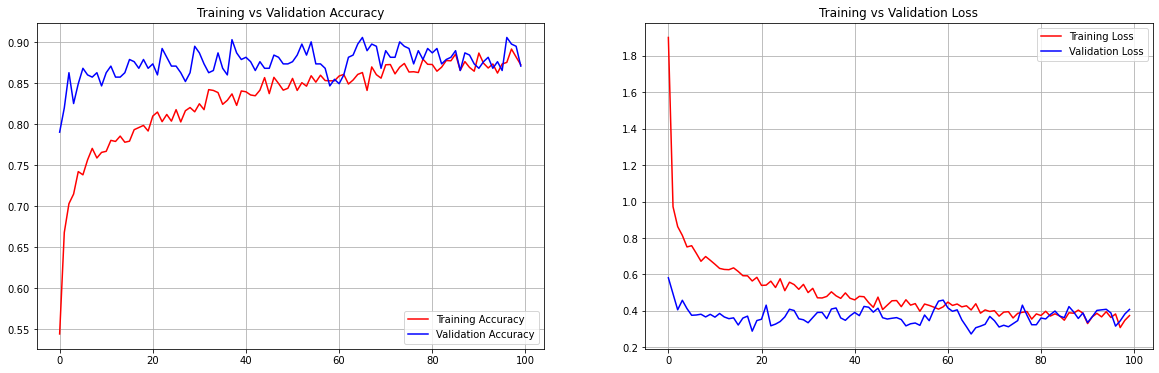

In [41]:
train_loss = history4.history.get('loss')
train_acc = history4.history.get('acc')
val_loss = history4.history.get('val_loss')
val_acc = history4.history.get('val_acc')

epochs = range(len(history4.epoch))

plt.figure( figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(epochs,train_acc, 'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()
# plt.show()

plt.subplot(1,2,2)
plt.plot(epochs,train_loss, 'r', label = 'Training Loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

# Model Prediction

In [42]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'short',
    8: 'skirt',
    9: 't-shirt'
}

# Get a complete path to the every type of clothes image
test_dress_pic = [os.path.join(test_dress_dir, name_fic) for name_fic in test_dress_names[0:pic_index]]
test_hat_pic = [os.path.join(test_hat_dir, name_fic) for name_fic in test_hat_names[0:pic_index]]
test_longsleeve_pic = [os.path.join(test_longsleeve_dir, name_fic) for name_fic in test_longsleeve_names[0:pic_index]]
test_outwear_pic = [os.path.join(test_outwear_dir, name_fic) for name_fic in test_outwear_names[0:pic_index]]
test_pants_pic = [os.path.join(test_pants_dir, name_fic) for name_fic in test_pants_names[0:pic_index]]
test_shirt_pic = [os.path.join(test_shirt_dir, name_fic) for name_fic in test_shirt_names[0:pic_index]]
test_shoes_pic = [os.path.join(test_shoes_dir, name_fic) for name_fic in test_shoes_names[0:pic_index]]
test_shorts_pic = [os.path.join(test_shorts_dir, name_fic) for name_fic in test_shorts_names[0:pic_index]]
test_skirt_pic = [os.path.join(test_skirt_dir, name_fic) for name_fic in test_skirt_names[0:pic_index]]
test_t_shirt_pic = [os.path.join(test_t_shirt_dir, name_fic) for name_fic in test_t_shirt_names[0:pic_index]]

test_all_pic = test_dress_pic + test_hat_pic + test_longsleeve_pic + test_outwear_pic + test_pants_pic + test_shirt_pic + test_shoes_pic + test_shorts_pic + test_skirt_pic + test_t_shirt_pic
test_all_pic

['Datasets/test\\dress\\06a00c0f-5f9a-410d-a7da-3881a9df3a71.jpg',
 'Datasets/test\\hat\\2a12baab-f020-42e3-8e6b-5d82e3ed0b55.jpg',
 'Datasets/test\\longsleeve\\03a33083-e7bf-414d-bd35-c56273ae779c.jpg',
 'Datasets/test\\outwear\\0028956e-9962-46f0-ad45-2c42f8a59d94.jpg',
 'Datasets/test\\pants\\01033304-f9a4-48c4-af65-677512880fae.jpg',
 'Datasets/test\\shirt\\01b3083f-4387-4753-8ae2-a2470dc53f19.jpg',
 'Datasets/test\\shoes\\07d88b75-85a4-407b-aa73-12294a2ff9a8.jpg',
 'Datasets/test\\shorts\\06248e28-9e26-4036-8a8f-40cc605c83fb.jpg',
 'Datasets/test\\skirt\\0558b2c5-be00-49de-b27f-8c88114ac36f.jpg',
 'Datasets/test\\shirt\\01b3083f-4387-4753-8ae2-a2470dc53f19.jpg']

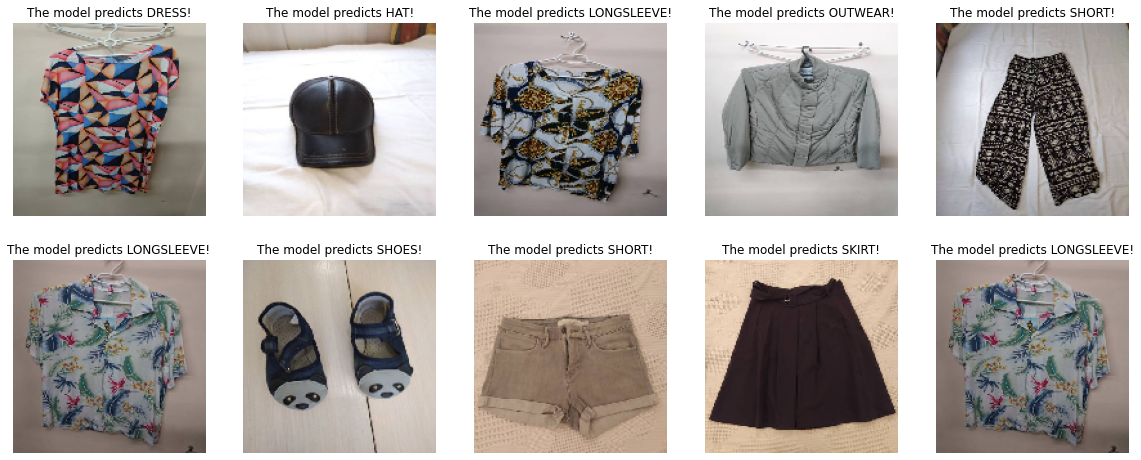

Test loss: 0.273
Test Accuracy: 90.59%


In [43]:
# Test the model using the saved model
model = load_model('Models/model_4.h5')

plt.figure( figsize=(20,8))
plt.axis(True)

for i, pic in enumerate(test_all_pic):
    # Inspect the file location
    file_loc = pic

    # load the image to the target size
    test_img = load_img(file_loc, target_size=(150, 150))

    # Turn the image into a 4D array (Not 3D, so we need to expand its dimension)
    # Most deep learning models expect a batch of images as input. In this case, we create a batch of one image.
    test_img = np.expand_dims(test_img, axis = 0)

    # Normalize the image
    test_img = test_img/255
    
    # Show the image to be predicted
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[0])
    plt.axis(False)
    
    # Make a prediction
    predict = model.predict(test_img)
    predict = np.argmax(predict) # predict = predict.argmax()
    plt.title('The model predicts {}!'.format(labels.get(predict).upper()))
    
plt.show()
loss, acc = model.evaluate( test_generator, verbose=0)
print('Test loss: {:.3f}'.format(loss))
print('Test Accuracy: {:.2f}%'.format(acc*100))